In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

table1 = pd.read_excel('data/pentathlon-II.xls',  nrows= 3, usecols = "A:I")
table1

,1 e-mail per week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
0,Subscriber attrition for promotional e-mails,0.005,0.0078,0.0048,0.0078,0.006,0.005,0.0045,0.0043
1,Average revenue from subscribed customer,0.290,0.3100,0.3000,0.3200,0.290,0.260,0.2700,0.2800
2,Average revenue from unsubscribed customer,0.000,0.1800,0.1600,0.1300,0.130,0.130,0.1200,0.1300


In [26]:
table2 = pd.read_excel('data/pentathlon-II.xls',  skiprows=5, nrows= 3, usecols = "A:I")
table2

,2 e-mails per week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
0,Subscriber attrition for promotional e-mails,0.009,0.0083,0.0076,0.0073,0.0093,0.0064,0.0065,0.006
1,Average revenue from subscribed customer,0.350,0.3600,0.3500,0.4100,0.3100,0.3300,0.2800,0.340
2,Average revenue from unsubscribed customer,0.000,0.1900,0.1600,0.1300,0.1300,0.1200,0.1300,0.130


In [27]:
table3 = pd.read_excel('data/pentathlon-II.xls',  skiprows=10, nrows= 3, usecols = "A:I")
table3

,3 e-mails per week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
0,Subscriber attrition for promotional e-mails,0.0188,0.0208,0.0295,0.028,0.0245,0.022,0.022,0.022
1,Average revenue from subscribed customer,0.3700,0.3300,0.3600,0.350,0.3300,0.360,0.370,0.360
2,Average revenue from unsubscribed customer,0.0000,0.2100,0.2000,0.140,0.1700,0.150,0.180,0.150


In [28]:
table4 = pd.read_excel('data/pentathlon-II.xls',  skiprows=15, nrows= 3, usecols = "A:I")
table4

,4 e-mails per week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
0,Subscriber attrition for promotional e-mails,0.0385,0.0525,0.058,0.0413,0.0398,0.031,0.031,0.031
1,Average revenue from subscribed customer,0.3600,0.3400,0.300,0.3800,0.3900,0.340,0.360,0.370
2,Average revenue from unsubscribed customer,0.0000,0.1900,0.160,0.1800,0.1700,0.120,0.120,0.120


In [29]:
customers = 10000


In [86]:
table1.iloc[0,1:].values
table1.iloc[1,1:].values
table1.iloc[2,1:].values

def CLV(subs, sub_rev, unsub_rev, interest_rate = 0.192):

    total_rev = 0
    total_revs = []
    
    for idx, val in enumerate(sub_rev):
        
        subs_rev = (customers*np.prod(1 - subs[0:idx]) * sub_rev[idx])/(1+interest_rate)**idx 
        
        unsubs_rev = ((customers - customers*np.prod(1 - subs[0:idx])) * unsub_rev[idx])/(1+interest_rate)**idx
        
        #print("{:0.2f}".format(subs_rev), "{:0.2f}".format(unsubs_rev))
        
        total_rev = total_rev + subs_rev + unsubs_rev
        total_revs.append(total_rev)
    
    return total_revs
    
CLV(table1.iloc[0,1:].values, table1.iloc[1,1:].values, table1.iloc[2,1:].values)

[2900.0,
 5495.218120805369,
 7594.0358823926845,
 9463.792499521605,
 10880.30804936602,
 11943.97357879895,
 12866.475886237073,
 13667.729882285812]

In [87]:
one_per_week = CLV(table1.iloc[0,1:].values, table1.iloc[1,1:].values, table1.iloc[2,1:].values)

two_per_week = CLV(table2.iloc[0,1:].values, table2.iloc[1,1:].values, table2.iloc[2,1:].values)

three_per_week = CLV(table3.iloc[0,1:].values, table3.iloc[1,1:].values, table3.iloc[2,1:].values)

four_per_week = CLV(table4.iloc[0,1:].values, table4.iloc[1,1:].values, table4.iloc[2,1:].values)

In [88]:
print(sum(one_per_week))

print(sum(two_per_week))

print(sum(three_per_week))

print(sum(four_per_week))

74811.53389940751
88492.91033044251
87482.15840098538
84578.53272364775


2. What e-mail frequency should Pentathlon adopt? Motivate your recommendation. (6 points)

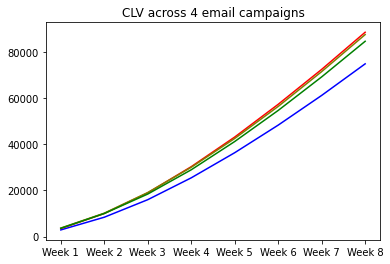

In [89]:
plt.plot(['Week '+str(x) for x in range(1,9)], np.cumsum(one_per_week), color = 'b')
plt.plot(['Week '+str(x) for x in range(1,9)], np.cumsum(two_per_week), color = 'r')
plt.plot(['Week '+str(x) for x in range(1,9)], np.cumsum(three_per_week), color = 'olive')
plt.plot(['Week '+str(x) for x in range(1,9)], np.cumsum(four_per_week), color = 'green')
plt.title('CLV across 4 email campaigns')
plt.show()

3. What e-mail frequency would you recommend if you considered a longer time horizon? Why? Make your argument without formally extending the CLV calculation. (5 points)

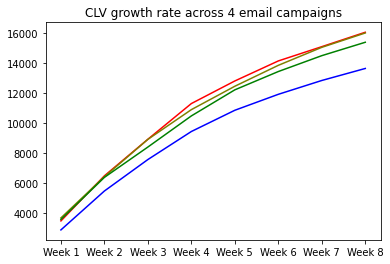

In [90]:
plt.plot(['Week '+str(x) for x in range(1,9)], one_per_week, color = 'b')
plt.plot(['Week '+str(x) for x in range(1,9)], two_per_week, color = 'r')
plt.plot(['Week '+str(x) for x in range(1,9)], three_per_week, color = 'olive')
plt.plot(['Week '+str(x) for x in range(1,9)], four_per_week, color = 'green')
plt.title('CLV growth rate across 4 email campaigns')
plt.show()

4. Calculate the CLV for each of the plans after 104 weeks using the average churn and revenue numbers provided on GitLab. Generate a line plot to compare the five CLV curves.
Are your results consistent with your answer to question 3? Why (or why not)? (6 points)

In [100]:
Week1_104 = CLV(np.repeat(np.mean(table1.iloc[0,1:].values), 104), np.repeat(np.mean(table1.iloc[1,1:].values), 104),
np.repeat(np.mean(table1.iloc[2,1:].values), 104))

Week2_104 = CLV(np.repeat(np.mean(table2.iloc[0,1:].values), 104), np.repeat(np.mean(table2.iloc[1,1:].values), 104),
np.repeat(np.mean(table2.iloc[2,1:].values), 104))

Week3_104 = CLV(np.repeat(np.mean(table3.iloc[0,1:].values), 104), np.repeat(np.mean(table3.iloc[1,1:].values), 104),
np.repeat(np.mean(table3.iloc[2,1:].values), 104))

Week4_104 = CLV(np.repeat(np.mean(table4.iloc[0,1:].values), 104), np.repeat(np.mean(table4.iloc[1,1:].values), 104),
np.repeat(np.mean(table4.iloc[2,1:].values), 104))

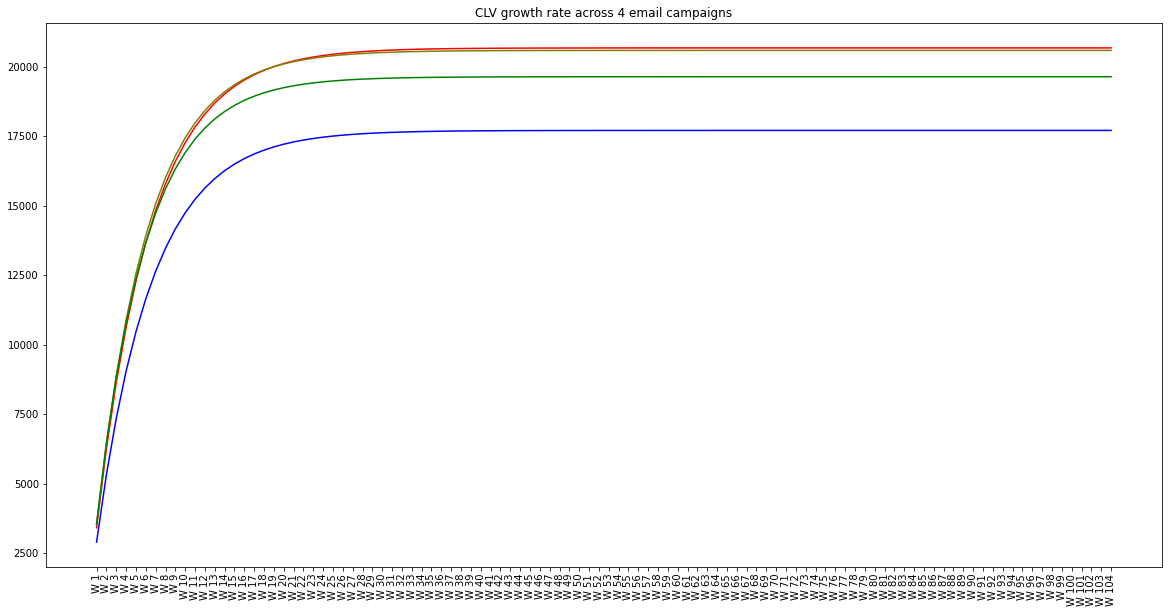

In [105]:
plt.figure(figsize=(20,10))

plt.plot(['W '+str(x) for x in range(1,105)], Week1_104, color = 'b')
plt.plot(['W '+str(x) for x in range(1,105)], Week2_104, color = 'r')
plt.plot(['W '+str(x) for x in range(1,105)], Week3_104, color = 'olive')
plt.plot(['W '+str(x) for x in range(1,105)], Week4_104, color = 'green')
plt.title('CLV growth rate across 4 email campaigns')
plt.xticks(rotation=90)
plt.show()

In [102]:
print(sum(Week1_104))

print(sum(Week2_104))

print(sum(Week3_104))

print(sum(Week4_104))

1751087.2390661296
2045573.942737881
2041262.0025644994
1952471.3774145069
